# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 


#### Objective
Analyze the dataset containing information about various vehicles and their corresponding attributes such as price, vehicle age, mileage, make, model, condition, and transmission type, among others.

Our goal is to provide insights and recommendations to used car dealers by identifying which features customers value the most in a car.

#### Approach
We will begin with exploratory data analysis (EDA) to understand the distribution of data and relationships between variables. This will be followed by predictive modeling to quantify the influence of different features on the car price.

#### Key Questions for Analysis

Based on the provided dataset attributes, we aim to explore and answer the following questions:

1. **Is the price of a used car reasonable given its attributes?**
   - How well can we predict the car's price using features such as year, manufacturer, model, condition, mileage (odometer), and others?

2. **Does the car price vary across different U.S. states or regions?**
   - Are there noticeable differences in average car prices by `state` or `region`?

3. **How do core vehicle attributes affect used car pricing?**
   - What is the relationship between car `mileage` (odometer reading) and price?
   - Does the `year` of manufacture impact pricing significantly?
   - Are certain `makes` and `models` consistently priced higher or lower than others?
   - How much does the `condition` of the vehicle affect its market value?

4. **What role does transmission type play in pricing?**
   - Is there a significant difference in price between cars with `manual` vs. `automatic` transmissions?

5. **Do other features have a measurable impact on price?**
   - Does the number of `cylinders` or the type of `fuel` influence pricing?
   - Are specific `title_status` types (e.g., clean, salvage) associated with lower or higher prices?
   - Do `drive` type (e.g., 4wd, fwd, rwd), `size`, or `type` of vehicle impact price?
   - Does the `paint_color` influence pricing?

We will address these questions through a combination of visual exploration and predictive modeling techniques.



### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

1. **Read in the `vehicles.csv` file.**

In [27]:
import os
import re
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import KNNImputer

warnings.filterwarnings("ignore")

In [28]:
os.makedirs('images', exist_ok=True)
os.makedirs('images', exist_ok=True)
os.makedirs('images/all', exist_ok=True)
np.set_printoptions(precision=4, suppress=True)


In [29]:
data = pd.read_csv('data/vehicles.csv')

2. **Investigate the Dataset for Missing or Problematic Data**
   - Inspect the **data types** and **unique values** for each attribute to gain insight into the nature of the data.
   - Examine which columns contain missing data and assess the extent of missingness.
   - Understand the distribution of attributes.
   - Examine if the dataset has any duplicated rows.
   - Understand the correlation between numeric attributes.


In [30]:
# Understand the underlying data
# Transpose the rows to columns so it is easy to inspect all the columns
sample_df = data.sample(5)
sample_df.index.name = "Row Num"
sample_df_T = sample_df.T
# sort the column names for easy inspection
sample_df_T = sample_df_T.sort_index(axis=0)
sample_df_T

Row Num,386036,392117,85052,192154,160214
VIN,1FDAW57P46ED02529,4T1B11HK4KU829484,WBAJE7C57KWW02218,1N4CL21E08C135070,3N1AB7AP7EY285038
condition,good,good,good,excellent,like new
cylinders,8 cylinders,NaN,NaN,4 cylinders,4 cylinders
drive,4wd,NaN,NaN,NaN,fwd
fuel,diesel,other,other,hybrid,gas
id,7311477390,7314646497,7308344909,7313988193,7316431697
manufacturer,ford,toyota,bmw,nissan,nissan
model,super duty f-550 drw,camry l sedan 4d,5 series 540i xdrive sedan,altima hybrid hev,sentra sv
odometer,59429.0,5607.0,14900.0,163369.0,67472.0
paint_color,red,red,white,NaN,black


In [31]:
# print number of rows and columns in the dataset
print(f"Dataset shape: {data.shape[0]} rows, {data.shape[1]} columns")

Dataset shape: 426880 rows, 18 columns


In [32]:
# Rename columns for easy reference
data.rename(columns = {
    'VIN': 'vin',
    'manufacturer': 'make'
}, inplace=True)

In [33]:
def print_column_info(df):
    """
    Print the data type and unique values in each column.
    """
    # Print the data type and unique values in each column
    for col in df.columns.sort_values():
        print("Type = " + str(df[col].dtype))
        print(df[col].value_counts(dropna=False))
        print("-" * 30)

print_column_info(data)

Type = object
condition
NaN          174104
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64
------------------------------
Type = object
cylinders
NaN             177678
6 cylinders      94169
4 cylinders      77642
8 cylinders      72062
5 cylinders       1712
10 cylinders      1455
other             1298
3 cylinders        655
12 cylinders       209
Name: count, dtype: int64
------------------------------
Type = object
drive
4wd    131904
NaN    130567
fwd    105517
rwd     58892
Name: count, dtype: int64
------------------------------
Type = object
fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
NaN           3013
electric      1698
Name: count, dtype: int64
------------------------------
Type = int64
id
7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
             ..
7314655506    1
7314655833    1
7314657468    1
73146599

We observe that the **`model`** column is **heterogeneous**—it contains a wide range of information beyond just the model name. This includes:

- Vehicle **make**
- **Drive** type (e.g., AWD, FWD)
- **Fuel** type (e.g., gas, diesel)
- **Transmission** (e.g., automatic, manual)
- **Trim/package** information
- Possibly even **year**, **color**, or **vehicle condition**

This embedded information can be **extracted and leveraged** to fill in missing values in other relevant columns, significantly improving data completeness and quality.


          odometer     price      year
odometer  1.000000  0.010032 -0.157215
price     0.010032  1.000000 -0.004925
year     -0.157215 -0.004925  1.000000


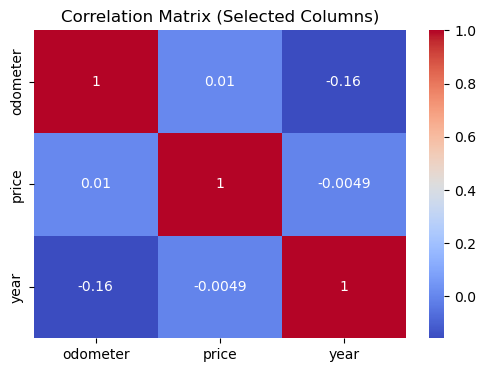

In [34]:
# Seek correlation between numerical columns
def plot_correlation_heatmap(df, columns, figsize=(6, 4), title='Correlation Matrix (Selected Columns)'):
    """
    Plots a heatmap of the correlation matrix for the specified columns in the DataFrame.
    """
    columns = columns.difference(['id'])  # Exclude 'id' column if present
    corr_matrix = df[columns].corr()
    print(corr_matrix)
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()
    # corr_matrix["price"][:].sort_values().plot(kind = "bar")

plot_correlation_heatmap(data, data.select_dtypes(include=[np.number]).columns)

**Correlation Insights**

From the correlation matrix, we observe that there are **no strong correlations** between the following variable pairs:

- `year` and `odometer` (correlation ≈ -0.16)
- `year` and `price`
- `price` and `odometer`

**Year vs. Odometer**  

While we generally expect **newer cars to have lower mileage**, the observed correlation of **-0.16** indicates only a weak negative relationship. This means that, on average, newer cars tend to have slightly lower mileage, but there are many exceptions—some older cars have low mileage, and some newer cars have high mileage. The weak correlation suggests that other factors also influence mileage.

**Year vs. Price**  

Similarly, we anticipate that **newer cars would be more expensive**. However, the weak correlation suggests that **other attributes**—such as **brand**, **condition**, or **vehicle type**—may play a more significant role in determining price.

**Price vs. Odometer**  

We also expect that **as mileage increases, price decreases**. The correlation is near zero so **not enough** to make confident conclusions. 

**Note**: It is also possible that outliers are affecting the correlation. We will reexamin the correlation after we have normalized these columns.

**Missing value and outliers**

In [35]:
# check the distribution of  numerical columns
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


,missing_count,missing_pct
year,1205.0,0.0
make,17646.0,4.0
model,5277.0,1.0
condition,174104.0,41.0
cylinders,177678.0,42.0
fuel,3013.0,1.0
odometer,4400.0,1.0
title_status,8242.0,2.0
transmission,2556.0,1.0
vin,161042.0,38.0


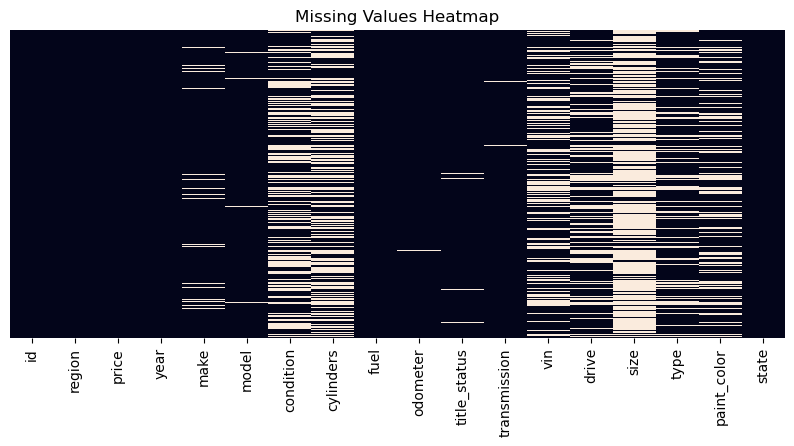

In [36]:
# Function to get missing value stats
def display_missing_values(df):
    dataNullStats = df.isnull().agg(['sum', 'mean']).T
    dataNullStats.rename(columns={'sum': 'missing_count', 'mean': 'missing_pct'}, inplace=True)
    dataNullStats['missing_pct'] = round(dataNullStats['missing_pct'] * 100)
    missing_stats = dataNullStats[dataNullStats['missing_count'] > 0]
    display(missing_stats)

def plot_missing_heatmap(df, figsize=(10, 4), title="Missing Values Heatmap"):
    """Plot a heatmap of missing values for the given DataFrame."""
    plt.figure(figsize=figsize)
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
    plt.title(title)
    plt.show()

# Display missing value statistics
display_missing_values(data)
plot_missing_heatmap(data)

In [37]:
# VIN is the unique identifier for each vehicle, so it should not have any missing values nor duplicates.
# Check for duplicated VINs
print("\nChecking for duplicated VINs:")
dup_counts = data["vin"].value_counts()
duplicates = dup_counts[dup_counts > 1]
if not duplicates.empty:
    print(f"Found {len(duplicates)} duplicated VINs.")
else:
    print("No duplicated VINs found.")


Checking for duplicated VINs:
Found 40280 duplicated VINs.


In [38]:
# Show the distribution of a column and return insignificant categories
def get_column_distribution_with_insignificant(df, column, threshold, top_n=20, plot=False):
    """
    Display the value counts and (optionally) plot the distribution of a column.
    Returns a dictionary with a list of insignificant category names.
    """
    counts = df[column].value_counts()
    rel_freq = (counts / counts.sum()).round(4)
    
    # Use column-specific threshold if available, else use wildcard "*"
    thresh = threshold.get(column, threshold.get("*"))
    
    # Find insignificant categories
    insignificant = rel_freq[rel_freq < thresh]
    
    if plot:
        counts.head(top_n).plot(kind='bar', figsize=(10, 4))
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Distribution of {column} (Top {top_n})')
        plt.show()
    return {
        "relative_frequencies": rel_freq,
        "insignificant": list(insignificant.keys())
    }

def get_insignificant_categories_for_all_columns(df, threshold, exclude=None, top_n=50, plot=False):
    """
    Show distributions for all columns except those in the exclude list.
    Returns a dictionary of results for each column.
    """
    if exclude is None:
        exclude = []
    results = {}
    for col in df.columns:
        if col not in exclude:
            results[col] = get_column_distribution_with_insignificant(df, col, threshold, top_n=top_n, plot=plot)
    return results

results = get_insignificant_categories_for_all_columns(
    data, 
    threshold={
        '*': 0.01
    },
    exclude=['id', 'model', 'vin', 'price', 'odometer', 'year']
)

for col, res in results.items():
    print(f"{col}:")
    print(res["relative_frequencies"])
    print()

region:
region
columbus                   0.0085
jacksonville               0.0083
spokane / coeur d'alene    0.0070
eugene                     0.0070
fresno / madera            0.0070
                            ...  
meridian                   0.0001
southwest MS               0.0000
kansas city                0.0000
fort smith, AR             0.0000
west virginia (old)        0.0000
Name: count, Length: 404, dtype: float64

make:
make
ford               0.1735
chevrolet          0.1346
toyota             0.0836
honda              0.0520
nissan             0.0466
jeep               0.0465
ram                0.0448
gmc                0.0410
bmw                0.0359
dodge              0.0335
mercedes-benz      0.0289
hyundai            0.0253
subaru             0.0232
volkswagen         0.0228
kia                0.0207
lexus              0.0200
audi               0.0185
cadillac           0.0170
chrysler           0.0147
acura              0.0146
buick              0.0134
mazda       

**Missing Values and Outlier Insights**

- The **heatmap** shows that the following columns have the highest proportion of missing values:
  - `condition`
  - `cylinders`
  - `drive`
  - `size`
  - `type`
  - `paint_color`

- **Duplicate VIN numbers** were found in the dataset.
- There are many outliers present in the **`price`**, **`year`**, and **`odometer`** columns, which will need to be removed.
- Several columns contain statistically insignificant values. These can be masked to prevent them from affecting the modeling process.

##### ✅ Next Steps
 
1. Clean string fields by removing invalid characters and trimming values that exceed a reasonable length.
2. Identify and remove outliers from numeric columns to improve data quality and analysis.
3. The `model` column contains a wealth of embedded information. We'll extract relevant details to help populate missing values in other columns.
4. Recalculate correlations between numeric features to uncover any stronger or hidden relationships.
5. Drop rows with duplicate `vin`
6. Drop columns not useful for modeling such as `vin` and those with more than 50% missing data.
7. Mask statistically insignificant values.


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

**Sanitize** both numerical and string columns

In [39]:
# Sanitize string columns in the DataFrame
def sanitize_string_columns(data):
    """
    Cleans all string (object) columns in the DataFrame by:
      - Converting all text to lower case.
      - Stripping leading and trailing whitespace.
      - Replacing * and ~ with a space.
      - Removing punctuation (except whitespace).
      - Replacing multiple consecutive whitespace characters with a single space.
      - Converting empty strings to NaN (missing values).
    """
    str_cols = data.select_dtypes(include='object').columns
    for col in str_cols:
        original_na = data[col].isna().sum()
        data[col] = (
            data[col].astype(str)
                .str.lower()
                .str.replace(r'[\*~]+', ' ', regex=True)           # Replace * and ~ with space
                .str.replace(r'[^\w\s]', '', regex=True)           # Remove punctuation except whitespace
                .str.replace(r'\s+', ' ', regex=True)              # Collapse multiple spaces
                .str.strip()                                       # Strip leading/trailing spaces
                .replace(['', 'nan', 'none'], np.nan) 
        )
        new_na = data[col].isna().sum()
        print(f"Sanitized '{col}': {new_na - original_na} new NaN values introduced")
    print("Sanitized string columns:", list(str_cols))
    return data

def sanitize_numeric_columns(data):
    """
    Replace 0 values with np.nan in all numeric columns.
    Print the number of values sanitized for each column.
    """
    num_cols = data.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        num_zeros = (data[col] <  0).sum()
        data[col] = data[col].replace(0, np.nan)
        print(f"Sanitized '{col}': replaced {num_zeros} zero values with NaN")
    print("Sanitized numeric columns:", list(num_cols))
    return data

data = sanitize_string_columns(data)
data = sanitize_numeric_columns(data)
#print_column_info(data)

Sanitized 'region': 0 new NaN values introduced
Sanitized 'make': 0 new NaN values introduced
Sanitized 'model': 78 new NaN values introduced
Sanitized 'condition': 0 new NaN values introduced
Sanitized 'cylinders': 0 new NaN values introduced
Sanitized 'fuel': 0 new NaN values introduced
Sanitized 'title_status': 0 new NaN values introduced
Sanitized 'transmission': 0 new NaN values introduced
Sanitized 'vin': 1 new NaN values introduced
Sanitized 'drive': 0 new NaN values introduced
Sanitized 'size': 0 new NaN values introduced
Sanitized 'type': 0 new NaN values introduced
Sanitized 'paint_color': 0 new NaN values introduced
Sanitized 'state': 0 new NaN values introduced
Sanitized string columns: ['region', 'make', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'vin', 'drive', 'size', 'type', 'paint_color', 'state']
Sanitized 'id': replaced 0 zero values with NaN
Sanitized 'price': replaced 0 zero values with NaN
Sanitized 'year': replaced 0 zero values wi

**Drop** duplicated `vin`, high missing columns, and unnecessary columns

In [40]:
# Drop rows with duplicated VINs
def drop_rows_with_duplicated_vins(data):
    """
    Drop duplicated VINs from the DataFrame.
    """
    before = len(data)
    data = data.drop_duplicates(subset='vin', keep='first')
    dropped = before - len(data)
    print(f"Dropped {dropped} duplicated VIN rows. Data shape is now: {data.shape}")
    return data

# Drop rows with VINs that have a length less than the 'mode' length
def drop_rows_with_vins_length_less_than_mode_length(data):
    """
    Drop rows with VINs that have a length less than the mode length.
    """
    before = len(data)
    data['vin_length'] = data['vin'].str.len()
    mode_length = data['vin_length'].mode()[0]
    data = data[data['vin_length'] == mode_length]
    data = data.drop(columns=['vin_length'])  # Drop the temporary column
    dropped = before - len(data)
    print(f"Dropped {dropped} VIN rows due to invalid length. Data shape is now: {data.shape}")
    return data

# Drop columns with more than 50% missing values and unnecessary columns
def drop_high_missing_columns(df, threshold=0.5):
    """Drop columns with more than `threshold` proportion of missing values."""
    missing_pct = df.isnull().mean()
    cols_to_drop = missing_pct[missing_pct > threshold].index
    print(f"Dropping {len(cols_to_drop)} columns with > {threshold*100}% missing values: {list(cols_to_drop)}")
    return df.drop(columns=cols_to_drop)

# Drop unnecessary columns
def drop_unnecessary_columns(df, columns):
    """Drop specified unnecessary columns."""
    print(f"Dropping unnecessary columns for modeling: {columns}")
    return df.drop(columns=columns)

data = drop_rows_with_duplicated_vins(data)
data = drop_high_missing_columns(data)
data = drop_rows_with_vins_length_less_than_mode_length(data)
data = drop_unnecessary_columns(data, ['vin'])

Dropped 308634 duplicated VIN rows. Data shape is now: (118246, 18)
Dropping 1 columns with > 50.0% missing values: ['size']
Dropped 1021 VIN rows due to invalid length. Data shape is now: (117225, 17)
Dropping unnecessary columns for modeling: ['vin']


**Convert** `cylinders` column to numeric by extracting the number of cylinders into `encoded_cylinders` column. <br>
Also given `region` is subset of `state` combine these columns into `state_region` column

In [41]:
# Extract the number from 'cylinders' where possible (Non-numeric extractions become NaN) into 'encoded_cylinders'
cyl_num = pd.to_numeric(data['cylinders'].str.extract(r'(\d+)')[0], errors='coerce')

# If 'cylinders' is 'other' and 'type' is 'electric', keep 'other' and assign 0 to it, else np.nan
data['encoded_cylinders'] = np.where(
    (data['cylinders'] == 'other') & (data['type'] == 'electric'),
    0,
    cyl_num
)

# Combine state and region into a single column as region is subset of state. 
# The effect of combining this will reduce the number of features in the model.
data['state_region'] = data['state'].str.cat(data['region'], sep='-')

**Parse** the `model` column and **extract** useful information to fill the missing values in other columns.

In [42]:
def apply_corrections(text, corrections):
    """Apply corrections to a single text string."""
    # Handle NaN and non-string values
    if pd.isna(text):
        return text
    
    # Apply corrections using regex
    for wrong, right in corrections.items():
        pattern = rf'\b{re.escape(wrong)}\b'
        text = re.sub(pattern, right, text, flags=re.IGNORECASE)
    
    return text

def fill_from_keywords(df, column, keyword_map, use_regex=False):
    if column not in df.columns:
        print(f"Column '{column}' does not exist in DataFrame.")
        return df
    
    before = df[column].isnull().sum()
    
    for label, pattern in keyword_map.items():
        if use_regex:
            mask = df[column].isnull() & df['model'].str.contains(pattern, regex=True, na=False)
        else:
            pattern_regex = r'(?i)\b(?:' + '|'.join(map(re.escape, pattern)) + r')\b'
            mask = df[column].isnull() & df['model'].str.contains(pattern_regex, regex=True, na=False)
        
        df.loc[mask, column] = label
    
    filled = before - df[column].isnull().sum()
    print(f"{column}: Filled {filled} missing values.")
    return df

def extract_make(df, makes):
    before = df['make'].isnull().sum()
    df['make'] = df.apply(
        lambda row: next(
            (make for make in makes if re.search(rf'\b{re.escape(make)}\b', row['model'])), 
            row['make']
        ),
        axis=1
    )
    filled = before - df['make'].isnull().sum()
    print(f"make: Filled {filled} missing values.")
    return df

# --- Main Cleaning Function ---
def clean_vehicle_data(df):
    # convert to text
    data['model'] = data['model'].astype(str)
    
    # Common spelling corrections
    corrections = {
        'chevy': 'chevrolet', 'chev': 'chevrolet',
        'toyata': 'toyota', 'toyotoa': 'toyota', 'toytoa': 'toyota',
        'mercdes': 'mercedes', 'mecdes': 'mercedes', 'merc': 'mercedes',
        'volk': 'volkswagen', 'volks': 'volkswagen', 'volswagen': 'volkswagen',
        'shawd': 'sh-awd', 'sh awd': 'sh-awd',
        'tech pkg': 'technology package', 'tech': 'technology package',
        'advance pkg sport': 'advance package', 'pakage': 'package',
        'harleydavidson': 'harley-davidson', 'adance': 'advance'
    }
    df['model'] = df['model'].apply(lambda x: apply_corrections(x, corrections))

    # --- Keyword maps ---
    keywords = {
        'drive': {
            '4wd': ['4wd', 'awd', '4x4'],
            'fwd': ['fwd', '2wd'],
            'rwd': ['rwd']
        },
        'transmission': { # Regex patterns used here
            'automatic': r'(?i)(?<!\w)(?:automatic|4matic|auto)(?!\w)',
            'manual': r'(?i)\bmanual\b'
        },
        'fuel': {
            'gas': ['gas'], 'diesel': ['diesel'],
            'electric': ['electric'], 'hybrid': ['hybrid']
        },
        'condition': {
            'excellent': ['excellent'], 'good': ['good'],
            'fair': ['fair'], 'like new': ['like new'],
            'new': ['new'], 'salvage': ['salvage']
        },
        'type': {
            'sedan': ['sedan', 'sdn'], 'SUV': ['suv'],
            'pickup': ['pickup', 'pick up'], 'truck': ['truck'],
            'van': ['van'], 'wagon': ['wagon'], 'coupe': ['coupe'],
            'convertible': ['convertible'], 'hatchback': ['hatchback'],
            'bus': ['bus']
        },
        'paint_color': {
            'white': ['white'], 'black': ['black'], 'silver': ['silver'],
            'blue': ['blue'], 'red': ['red'], 'grey': ['grey', 'gray'],
            'green': ['green'], 'brown': ['brown'], 'yellow': ['yellow'],
            'orange': ['orange'], 'purple': ['purple'], 'custom': ['custom']
        },
        'cylinders': {  # Regex patterns used here
            '3 cylinders': r'(?i)\b3[\s\-]?cylinders?\b',
            '4 cylinders': r'(?i)\b4[\s\-]?cylinders?\b|\bv4\b',
            '5 cylinders': r'(?i)\b5[\s\-]?cylinders?\b',
            '6 cylinders': r'(?i)\b6[\s\-]?cylinders?\b|\bv6\b',
            '8 cylinders': r'(?i)\b8[\s\-]?cylinders?\b|\bv8\b',
            '10 cylinders': r'(?i)\b10[\s\-]?cylinders?\b|\bv10\b',
            '12 cylinders': r'(?i)\b12[\s\-]?cylinders?\b|\bv12\b'
        }
    }

    # Apply keyword-based extraction
    for col, mapping in keywords.items():
        is_regex = col in ['transmission', 'cylinders']
        df = fill_from_keywords(df, col, mapping, use_regex=is_regex)

    # Extract make
    known_makes = [
        'ford', 'chevrolet', 'toyota', 'honda', 'gmc', 'kia',
        'nissan', 'hyundai', 'mazda', 'jeep', 'mercedes',
        'volkswagen', 'harley-davidson'
    ]
    df = extract_make(df, known_makes)
    return df

data = clean_vehicle_data(data)

drive: Filled 756 missing values.
transmission: Filled 0 missing values.
fuel: Filled 15 missing values.
condition: Filled 87 missing values.
type: Filled 631 missing values.
paint_color: Filled 45 missing values.
cylinders: Filled 77 missing values.
make: Filled 27 missing values.


**Clean up** outliers in `price`, `odometer` and `year`.


=== Analyzing `price` ===


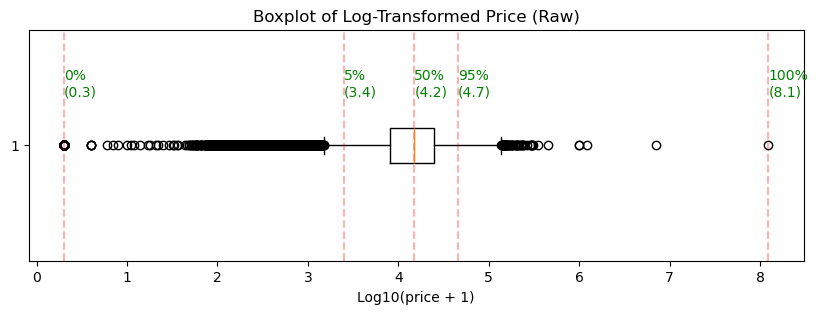

Filtering `price` between 5th and 90th percentiles: 2495.0036999.00
Total rows: 117225, Non-NaN in `price` before: 104689, after: 89108



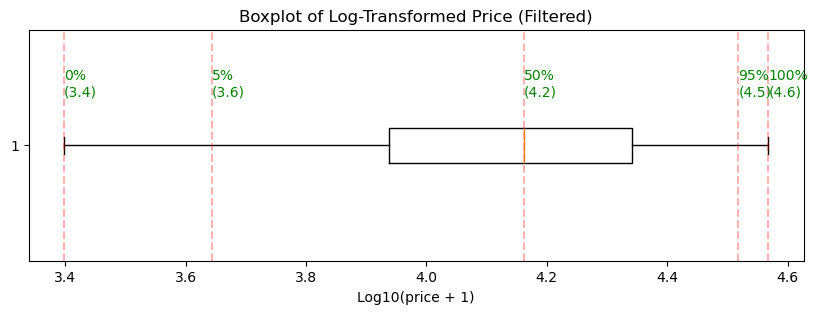


=== Analyzing `odometer` ===


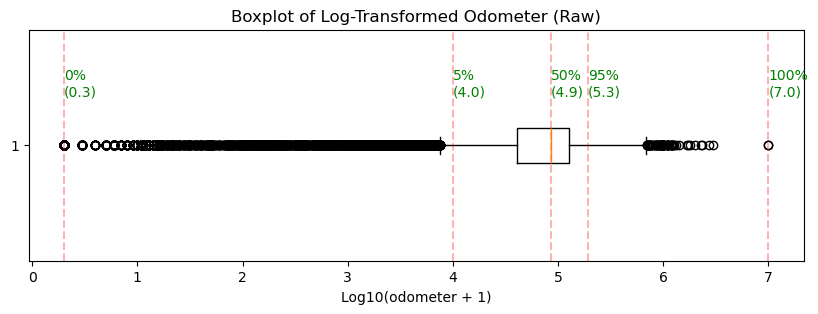

Filtering `odometer` between 3th and 90th percentiles: 5356.81166988.90
Total rows: 117225, Non-NaN in `odometer` before: 115128, after: 100161



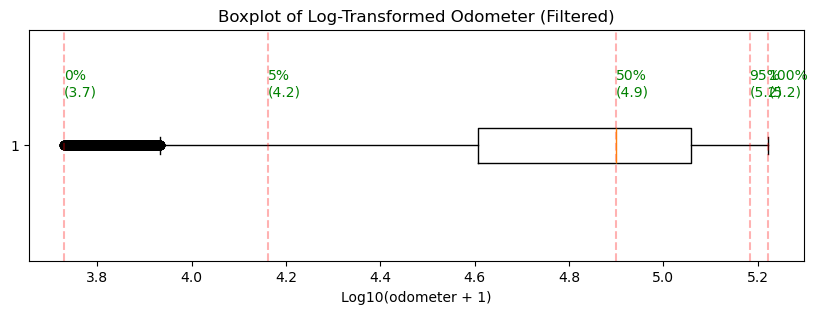


=== Analyzing `year` ===


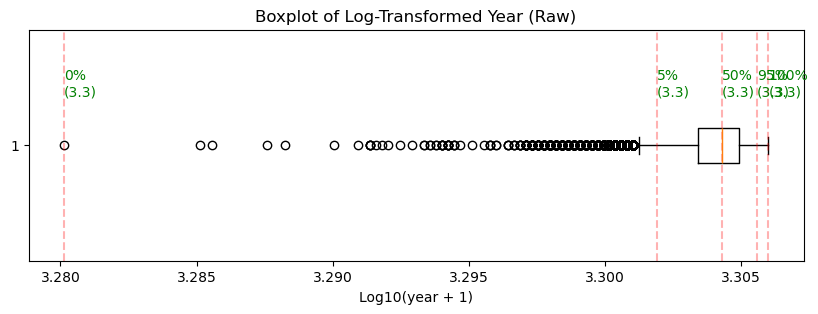

Filtering `year` between 5th and 99.5th percentiles: 2003.002021.00
Total rows: 117225, Non-NaN in `year` before: 116643, after: 111670



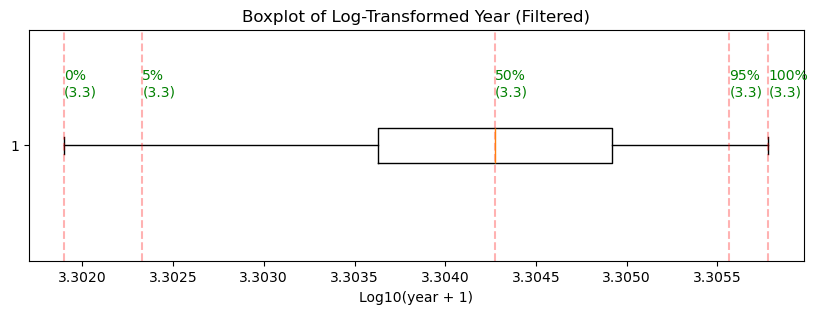

In [43]:
def plot_log_boxplot(df, col, percentiles=[0, 5, 50, 95, 100], title_suffix=""):
    """Plot a horizontal boxplot of log-transformed column with reference percentiles."""
    clean = df[col].dropna()
    log_vals = np.log10(clean + 1)
    pct_vals = np.percentile(log_vals, percentiles)
    labels = [f"{p}%" for p in percentiles]

    plt.figure(figsize=(10, 3))
    plt.boxplot(log_vals, vert=False)
    for p, label in zip(pct_vals, labels):
        plt.axvline(p, color='red', linestyle='--', alpha=0.3)
        plt.text(p, 1.2, f'{label}\n({p:.1f})', color='green', ha='left', va='bottom', fontsize=10)
    plt.title(f'Boxplot of Log-Transformed {col.capitalize()} {title_suffix}')
    plt.xlabel(f'Log10({col} + 1)')
    plt.show()

def filter_column_by_percentile(df, col, lower=5, upper=95):
    """Return a copy of df with values outside percentiles set to NaN for the given column."""
    clean = df[col].dropna()
    clean = clean[clean > 0]
    low, high = np.percentile(clean, [lower, upper])
    filtered = clean[(clean >= low) & (clean <= high)]
    print(f"Filtering `{col}` between {lower}th and {upper}th percentiles: {low:.2f}{high:.2f}")
    print(f"Total rows: {len(df)}, Non-NaN in `{col}` before: {clean.count()}, after: {filtered.count()}\n")
    result = df.copy()
    result[col] = filtered
    return result

print("\n=== Analyzing `price` ===")
plot_log_boxplot(data, 'price', title_suffix="(Raw)")
data = filter_column_by_percentile(data, 'price', 5, 90)
plot_log_boxplot(data, 'price', title_suffix="(Filtered)")

print("\n=== Analyzing `odometer` ===")
plot_log_boxplot(data, 'odometer', title_suffix="(Raw)")
data = filter_column_by_percentile(data, 'odometer', 3, 90)
plot_log_boxplot(data, 'odometer', title_suffix="(Filtered)")

print("\n=== Analyzing `year` ===")
plot_log_boxplot(data, 'year', title_suffix="(Raw)")
data = filter_column_by_percentile(data, 'year', 5, 99.5)
plot_log_boxplot(data, 'year', title_suffix="(Filtered)")

By removing the lowest 5% and highest 5% of values in the `price` column, we are able to eliminate most of the outliers. <br>
Similarly, we filter the `odometer` column by removing the lowest 3% and highest 10% of values, and the `year` column by removing the lowest 5% and highest 0.5% of values.


Impute **categorial** columns using groupby and mode.

In [44]:
def impute_by_mode(df, target_col, group_cols):
    """
    Impute missing values in `target_col` using the most common (mode) value
    from groups defined by `group_cols`.
    Only fills missing values, does not overwrite existing ones.
    """
    df = df.copy()
    missing_before = df[target_col].isnull().sum()
    if missing_before == 0:
        print(f"No missing values in '{target_col}'")
        return df

    print(f"Imputing {missing_before} missing '{target_col}' values using {group_cols}")

    # Only fill missing values
    mask = df[target_col].isnull()
    grouped = df.groupby(group_cols, observed=False)[target_col]

    # Get the mode for each group
    mode_map = grouped.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

    # Map group values to mode
    def get_mode(row):
        key = tuple(row[col] for col in group_cols)
        return mode_map.get(key, np.nan)

    df.loc[mask, target_col] = df[mask].apply(get_mode, axis=1)

    missing_after = df[target_col].isnull().sum()
    print(f"Filled {missing_before - missing_after} missing values. Remaining: {missing_after}")

    return df

# Apply and visualize
data['odometer_bin'] = pd.cut(data['odometer'], bins=[0, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 150000, 200000, float('inf')])
data = impute_by_mode(data, target_col='condition', group_cols=['odometer_bin', 'year'])
data = impute_by_mode(data, target_col='fuel', group_cols=['make', 'type', 'year'])
data = impute_by_mode(data, target_col='cylinders', group_cols=['make', 'type', 'year']) 
data = impute_by_mode(data, target_col='drive', group_cols=['make', 'type', 'fuel', 'cylinders', 'year'])
data = impute_by_mode(data, target_col='transmission', group_cols=['make', 'type', 'fuel', 'cylinders', 'year'])



Imputing 56734 missing 'condition' values using ['odometer_bin', 'year']
Filled 47092 missing values. Remaining: 9642
Imputing 1545 missing 'fuel' values using ['make', 'type', 'year']
Filled 960 missing values. Remaining: 585
Imputing 47608 missing 'cylinders' values using ['make', 'type', 'year']
Filled 34822 missing values. Remaining: 12786
Imputing 26242 missing 'drive' values using ['make', 'type', 'fuel', 'cylinders', 'year']
Filled 17063 missing values. Remaining: 9179
Imputing 1162 missing 'transmission' values using ['make', 'type', 'fuel', 'cylinders', 'year']
Filled 732 missing values. Remaining: 430


**Mask** insignificant categorial values.

In [45]:
# Get insignificant categories and mask them as NaN
results = get_insignificant_categories_for_all_columns(
    data, 
    threshold={
        '*': 0.01,
        "region": 0.001,
        "make": 0.015,
        "condition": 0.02,
        "cylinders": 0.28,
        "fuel": 0.1,
        "title_status": 0.1,
        "transmission": 0.14,
        "drive": 0.1,
        "size": 0.1,
        "type": 0.1,
        "paint_color": 0.1,
        "state": 0.01,
    },
    exclude=['id', 'model', 'vin', 'price', 'odometer', 'year']
)

for col, res in results.items():
    before = data[col].isna().sum()
    data[col] = data[col].replace(res['insignificant'], np.nan)
    after = data[col].isna().sum()
    print(f"Masked {after - before} values in column '{col}' as insignificant.")

Masked 7648 values in column 'region' as insignificant.
Masked 12407 values in column 'make' as insignificant.
Masked 1160 values in column 'condition' as insignificant.
Masked 25683 values in column 'cylinders' as insignificant.
Masked 15939 values in column 'fuel' as insignificant.
Masked 2219 values in column 'title_status' as insignificant.
Masked 15160 values in column 'transmission' as insignificant.
Masked 0 values in column 'drive' as insignificant.
Masked 35000 values in column 'type' as insignificant.
Masked 22405 values in column 'paint_color' as insignificant.
Masked 11341 values in column 'state' as insignificant.
Masked 1114 values in column 'encoded_cylinders' as insignificant.
Masked 87745 values in column 'state_region' as insignificant.
Masked 0 values in column 'odometer_bin' as insignificant.


In [46]:
# Convert year to age
def convert_year_to_age(df, year_col='year', current_year=2025):
    """
    Convert the 'year' column to 'age' in years.
    """
    if year_col not in df.columns:
        print(f"Column '{year_col}' does not exist in DataFrame.")
        return df
    
    df['age'] = current_year - df[year_col]
    df.drop(columns=[year_col], inplace=True)
    print(f"Converted '{year_col}' to 'age'.")
    return df

data = convert_year_to_age(data)

print(f"Dataset shape: {data.shape[0]} rows, {data.shape[1]} columns")

Converted 'year' to 'age'.
Dataset shape: 117225 rows, 19 columns


In [47]:
# Drop the odometer_bin column
data.drop(columns=['odometer_bin'], inplace=True)  

# Drop row where price is missing
print("Dropped", data['price'].isna().sum(), "rows with missing 'price'.")
data.dropna(subset=['price'], inplace=True)
print(f"Dataset shape: {data.shape[0]} rows, {data.shape[1]} columns")

# Drop rows where age is missing
print("Dropped", data['age'].isna().sum(), "rows with missing 'age'.")
data.dropna(subset=['age'], inplace=True)
print(f"Dataset shape: {data.shape[0]} rows, {data.shape[1]} columns")

# Drop rows where fuel is missing
print("Dropped", data['fuel'].isna().sum(), "rows with missing 'fuel'.")
data.dropna(subset=['fuel'], inplace=True)
print(f"Dataset shape: {data.shape[0]} rows, {data.shape[1]} columns")

Dropped 28117 rows with missing 'price'.
Dataset shape: 89108 rows, 18 columns
Dropped 4524 rows with missing 'age'.
Dataset shape: 84584 rows, 18 columns
Dropped 9287 rows with missing 'fuel'.
Dataset shape: 75297 rows, 18 columns


**Note about the data**

- The original dataset contained **426,880 rows**.
- We identified **308,634 rows** with duplicate `VIN`. For each duplicated VIN, we kept only one row and removed the rest.
- We also identified **1,021 rows** with invalid `VIN` length. So we dropped these rows.
- Since our goal is to model `price`, we also removed all **28,117 rows** where the `price` was zero.
- Given the challenges imputing `age` and `fuel`, we dropped **4,524 and 9,287 rows** respectively.
- As a result we are left with **75,297 rows**.

Dataset shape: 75297 rows, 18 columns


,missing_count,missing_pct
region,4913.0,7.0
make,9470.0,13.0
condition,4289.0,6.0
cylinders,20681.0,27.0
odometer,9164.0,12.0
title_status,3871.0,5.0
transmission,9018.0,12.0
drive,4774.0,6.0
type,30066.0,40.0
paint_color,32571.0,43.0


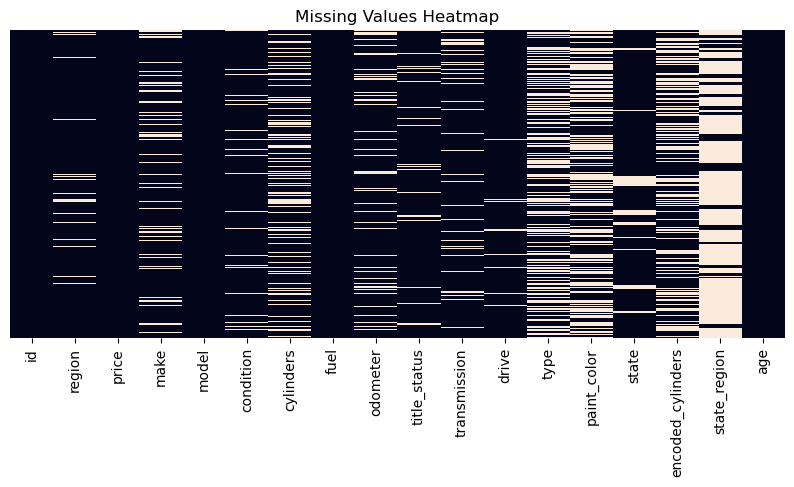

                        age  encoded_cylinders  odometer     price
age                1.000000           0.232262  0.625464 -0.641333
encoded_cylinders  0.232262           1.000000  0.137086  0.286137
odometer           0.625464           0.137086  1.000000 -0.566101
price             -0.641333           0.286137 -0.566101  1.000000


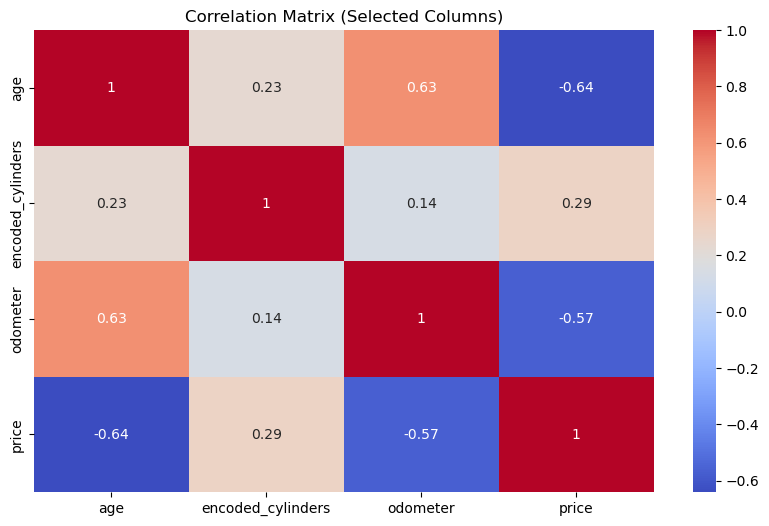

,id,price,odometer,encoded_cylinders,age
count,7.529700e+04,75297.000000,66133.000000,46487.000000,75297.000000
mean,7.312137e+09,15794.314249,86418.700951,5.514402,12.122714
std,4.206686e+06,8657.094506,42127.427156,1.494602,4.304944
min,7.301588e+09,2495.000000,5357.000000,4.000000,4.000000
25%,7.309396e+09,8838.000000,51316.000000,4.000000,9.000000
50%,7.313551e+09,13995.000000,88839.000000,6.000000,12.000000
75%,7.315511e+09,21720.000000,119810.000000,6.000000,15.000000
max,7.317099e+09,36999.000000,166988.000000,8.000000,22.000000


In [48]:
# Visualize the final state of all missing values and correlations
print(f"Dataset shape: {data.shape[0]} rows, {data.shape[1]} columns")
display_missing_values(data)
plot_missing_heatmap(data)
plot_correlation_heatmap(data, data.select_dtypes(include=[np.number]).columns, figsize=(10, 6))
data.describe()

**Correlation Insights After Data Cleaning**

The correlation matrix reveals **strong relationships** among several key variable pairs:

- **Year and Odometer**
- **Year and Price**
- **Price and Odometer**
- **Cylinders and Price**

**Year vs. Odometer**

There is a negative correlation of **-0.65**, indicating that **older cars tend to have higher odometer readings**. This aligns well with our intuition.

**Year vs. Price** 

A positive correlation of **0.62** supports the expectation that **newer cars generally command higher prices**.

**Price vs. Odometer** 

The negative correlation of **-0.55** confirms that **higher mileage typically leads to lower prices**.

**Cylinders and Price**

A positive correlation of **0.27** suggests as number of cyclinders increase price of the car also increases. This seems to align with our intution.

Overall, these correlations suggest that the data cleaning process has brought the dataset into a reliable and consistent state.

Next, we will focus on feature engineering to identify which categorical variables have the greatest impact on our target variable. This step will help us understand the importance of different categories and improve our model’s performance.


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Inspired by https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html

In [49]:
# Variables
train_size = 0.9
poly_degree = 2

Our modeling approach employs Ridge and Lasso regression techniques for predictive analysis. We transform categorical variables into numerical representations through OneHotEncoder preprocessing. Data quality is maintained by addressing missing values with SimpleImputer using constant fill strategies. Numerical features undergo standardization via StandardScaler and missing value imputation through SimpleImputer with constant fill methods. To enhance model performance and capture complex patterns, we incorporate second-degree polynomial features that help identify non-linear relationships within the data.

In [50]:
# 1. Data prep
def prepare_data(data, target_column='price', drop_columns=['id', 'model', 'cylinders', 'paint_color', 'state', 'region', 'year']):
    drop_columns = [col for col in drop_columns if col in data.columns]
    X = data.drop(columns=[target_column] + drop_columns)
    y = data[target_column]

    numerical_cols = X.select_dtypes(include=[np.number]).columns
    categorical_cols = X.select_dtypes(include=['object']).columns

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size, random_state=42)

    print(f"Categorical columns: {list(categorical_cols)}")
    print(f"Numerical columns: {list(numerical_cols)}")
    print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

    return X_train, X_test, y_train, y_test, numerical_cols, categorical_cols

# 2. Preprocessor
def create_preprocessor(numerical_cols, categorical_cols):
    numeric_pipeline = make_pipeline(
        SimpleImputer(strategy='constant', fill_value=0),
        StandardScaler(),
        PolynomialFeatures(
                degree=poly_degree, 
                interaction_only=False,
                include_bias=False  # Bias is handled by the regressor
            )
    )
    categorical_pipeline = make_pipeline(
        SimpleImputer(strategy='constant', fill_value='missing'),
        OneHotEncoder(
            drop='if_binary',  # Drop one category to avoid multicollinearity
            handle_unknown='ignore',
            sparse_output=False,
            feature_name_combiner=lambda feature, category: f"{feature}${category}"
        )
    )
    return ColumnTransformer(transformers=[
            ('num', numeric_pipeline, numerical_cols),
            ('cat', categorical_pipeline, categorical_cols)
        ],
        remainder="passthrough"
    )

# 3. Pipeline builder
def build_pipeline(regressor, preprocessor):
    steps = [('preprocessor', preprocessor)]
    steps.append(('regressor', regressor))
    return Pipeline(steps=steps)

# 4. GridSearch
def run_grid_search(model_name, regressor, param_grid, preprocessor, X_train, y_train):
    pipeline = build_pipeline(regressor, preprocessor)
    grid = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        scoring='neg_root_mean_squared_error',
        n_jobs=1,
        cv=5,
        error_score='raise'
    )
    grid.fit(X_train, y_train)
    print(f"\nBest params for {model_name}: {grid.best_params_}")
    print(f"Best CV RMSE: {abs(grid.best_score_):.2f}")
    return grid.best_estimator_

# 5. Evaluate model
def evaluate_model(pipeline, X_train, X_test, y_train, y_test, model_name="Model"):
    pipeline.fit(X_train, y_train)
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print(f"\n--- {model_name} ---")
    print(f"Train RMSE: {rmse_train:.2f}")
    print(f"Test RMSE : {rmse_test:.2f}")
    return {
        "model": model_name,
        "rmse_train": rmse_train,
        "rmse_test": rmse_test,
        "y_train_true": y_train,
        "y_train_pred": y_pred_train,
        "y_test_true": y_test,
        "y_test_pred": y_pred_test
    }

# --- MAIN EXECUTION ---
X_train, X_test, y_train, y_test, num_cols, cat_cols = prepare_data(data)
preprocessor = create_preprocessor(num_cols, cat_cols)

# Regressors + hyperparameters
alphas = np.array([
    0,                          # Linear regression (no regularization)
    1e-5, 1e-4, 1e-3, 1e-2,     # Small regularization
    0.1, 0.5, 1.0, 10.0,   # Medium regularization  
    400.0, 500.0, 800.0          # Large regularization
])
print(f"Alpha values for regularization ({len(alphas)} unique values): {', '.join(f'{alpha:.6g}' for alpha in alphas)}")
models_with_params = {
    "Ridge Regression": {
        "regressor": TransformedTargetRegressor(
            regressor=Ridge(),
            func=np.log10, # Log transformation of the target variable (i.e., price)
            inverse_func=sp.special.exp10 # Inverse transformation for predictions to bring them back to the original scale (i.e., price)
        ),
        "params": {"regressor__regressor__alpha": alphas},
    },
    "Lasso Regression": {
        "regressor": TransformedTargetRegressor(
            regressor=Lasso(max_iter=500, tol=4e-2),
            func=np.log10,
            inverse_func=sp.special.exp10
        ),
        "params": {"regressor__regressor__alpha": alphas},
    }
}

resultsList = []
predictions = {}
for name, config in models_with_params.items():
    print(f"\n--- Running GridSearch for {name} ---")
    best_model_pipe = run_grid_search(
        model_name=name,
        regressor=config["regressor"],
        param_grid=config["params"],
        preprocessor=preprocessor,
        X_train=X_train,
        y_train=y_train
    )
    result = evaluate_model(best_model_pipe, X_train, X_test, y_train, y_test, model_name=name)
    predictions[result["model"]] = {
        "pipe": best_model_pipe,
        "model": result["model"],
        "rmse_train": result["rmse_train"],
        "rmse_test": result["rmse_test"],
        "y_train_true": result["y_train_true"],
        "y_train_pred": result["y_train_pred"],
        "y_test_true": result["y_test_true"],
        "y_test_pred": result["y_test_pred"]
    }

Categorical columns: ['make', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'state_region']
Numerical columns: ['odometer', 'encoded_cylinders', 'age']
Train shape: (67767, 11), Test shape: (7530, 11)
Alpha values for regularization (12 unique values): 0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 400, 500, 800

--- Running GridSearch for Ridge Regression ---

Best params for Ridge Regression: {'regressor__regressor__alpha': 500.0}
Best CV RMSE: 4952.26

--- Ridge Regression ---
Train RMSE: 4949.18
Test RMSE : 4989.79

--- Running GridSearch for Lasso Regression ---

Best params for Lasso Regression: {'regressor__regressor__alpha': 0.0001}
Best CV RMSE: 4962.77

--- Lasso Regression ---
Train RMSE: 4958.45
Test RMSE : 4992.18


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Models Evaluation**

Let's evaluate our models created using Ridge and Lasso regression. For evaluating we will use the following metrics:

**Root Mean Square Error (RMSE)**: We expect the train data RMSE to be close to test data RMSE. A large gap indicates overfitting, while similar values suggest good generalization. RMSE penalizes larger errors more heavily than smaller ones, making it sensitive to outliers.

**Mean Absolute Error (MAE)**: This metric represents the average absolute difference between actual and predicted prices. Unlike RMSE, MAE treats all errors equally without penalizing large errors disproportionately. It's more robust to outliers and easier to interpret in business terms (average dollar error).

**R² (R-squared)**: This coefficient of determination measures the proportion of variance in car prices that our model can explain using the input features. R² ranges from 0 to 1, where:
- 0.70+ indicates a good model for car pricing
- 0.80+ indicates an excellent model
- Values closer to 1.0 mean the model explains most price variations

**Residual Standard Deviation**: This measures the typical spread of prediction errors around zero. It tells us the standard deviation of residuals (actual - predicted prices). For practical purposes:
- ~68% of predictions fall within ±1 residual std of actual price
- ~95% of predictions fall within ±2 residual std of actual price
- When residual std ≈ RMSE, it indicates the model is well-calibrated without systematic bias

**What We're Looking For**:
- **Low RMSE & MAE**: Smaller prediction errors
- **High R²**: Model explains more price variation
- **Similar Train/Test RMSE**: Good generalization (no overfitting)
- **Residual Std ≈ RMSE**: Well-calibrated model without bias


ANALYZING MODEL: Ridge Regression


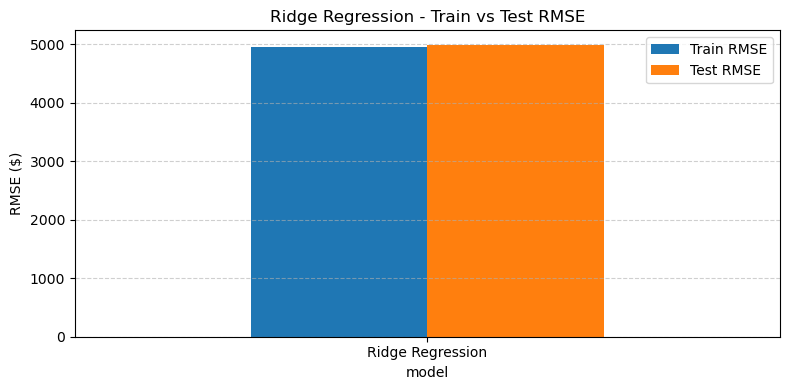


PERFORMANCE ANALYSIS: Ridge Regression
RMSE: $4989.79
R²: 0.6714 (67.1% variance explained)
MAE: $3492.33
Residual std: $4941.99


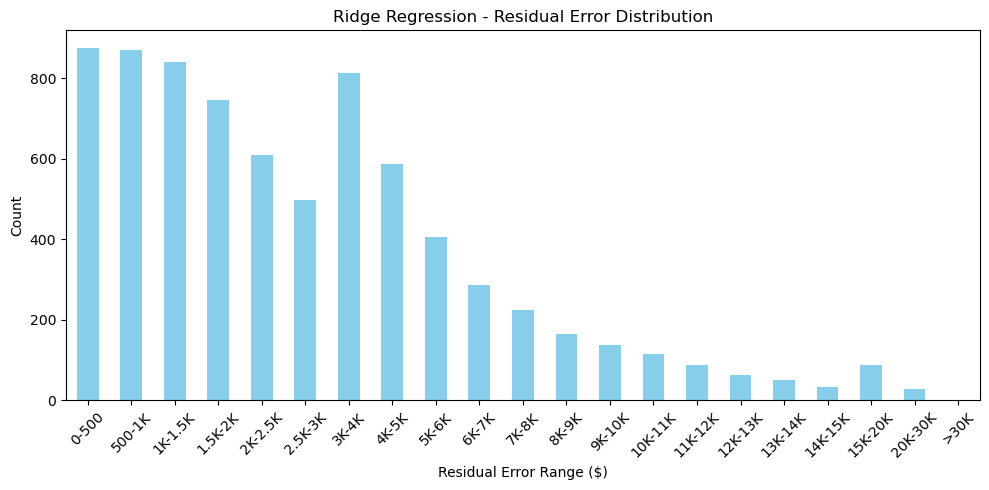

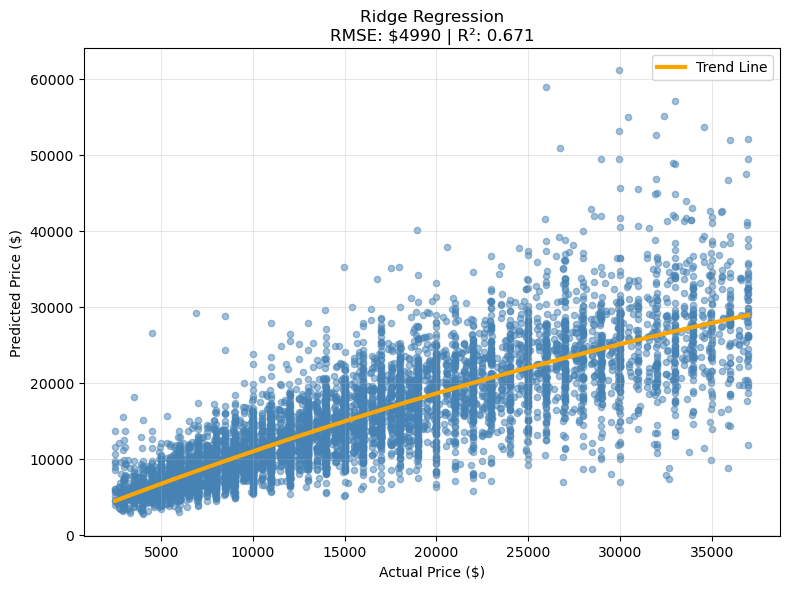


RIDGE REGRESSION - FEATURE IMPORTANCE
Intercept: 4.116953308917091


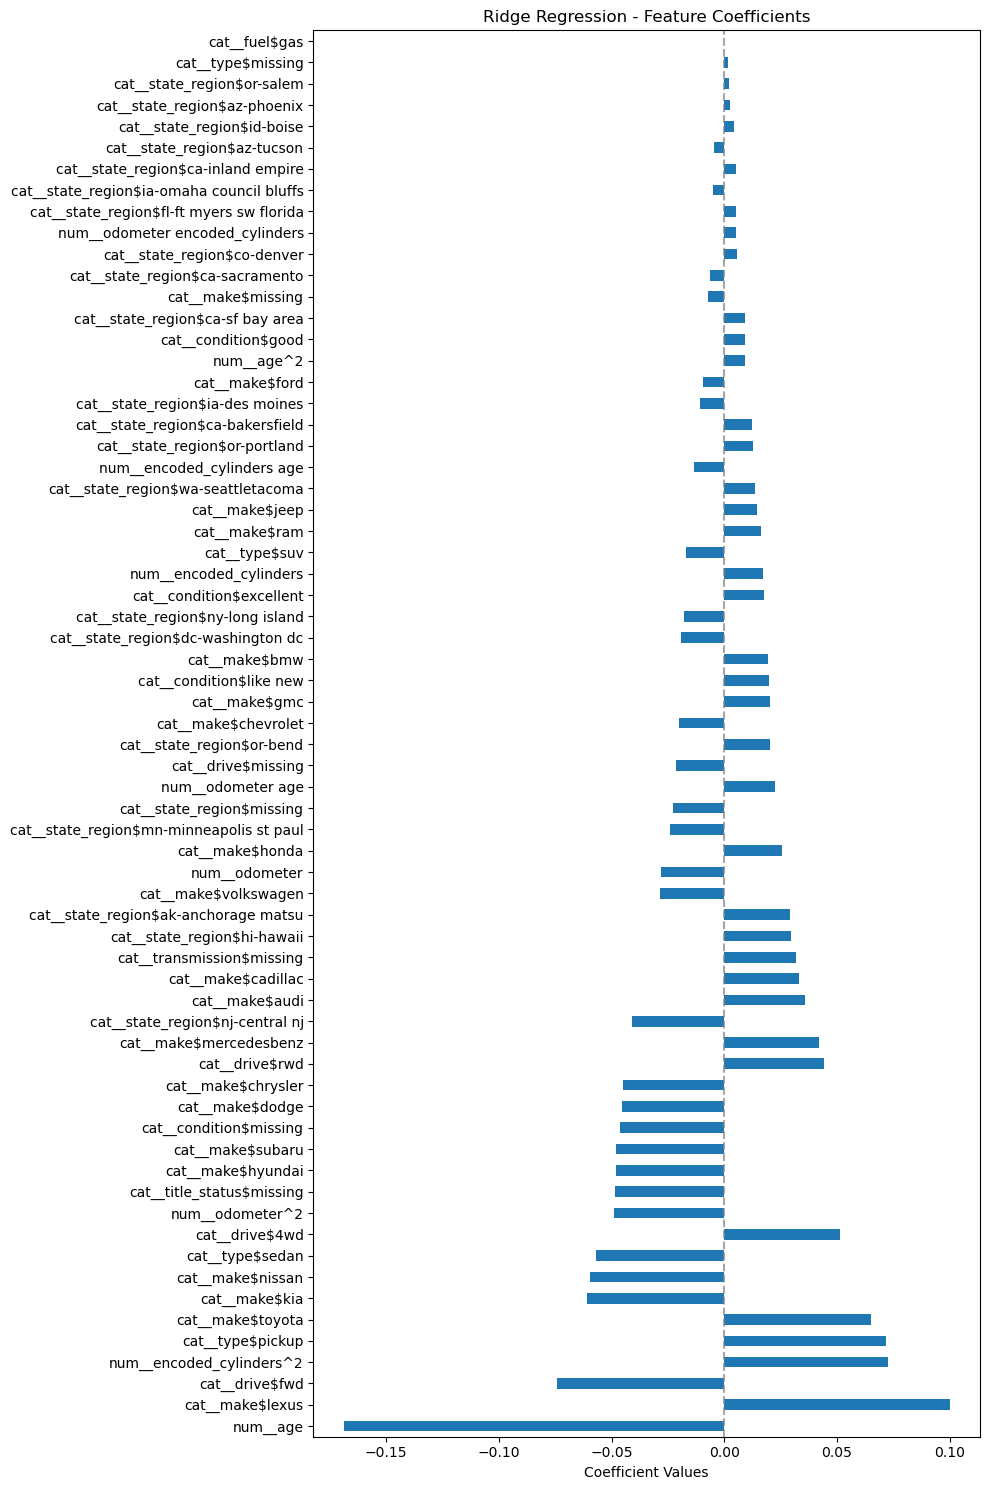


ANALYZING MODEL: Lasso Regression


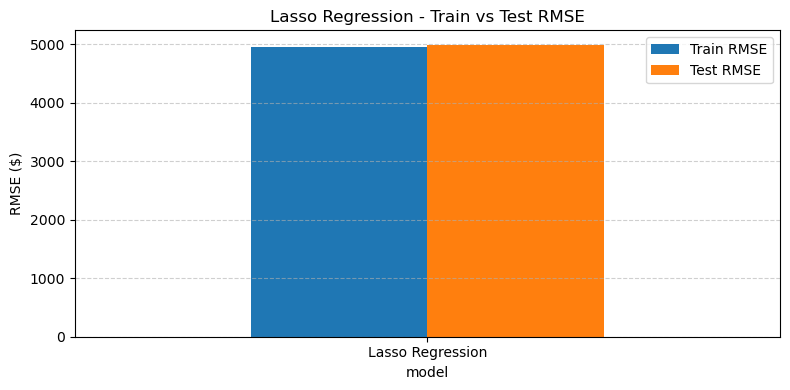


PERFORMANCE ANALYSIS: Lasso Regression
RMSE: $4992.18
R²: 0.6711 (67.1% variance explained)
MAE: $3482.91
Residual std: $4951.10


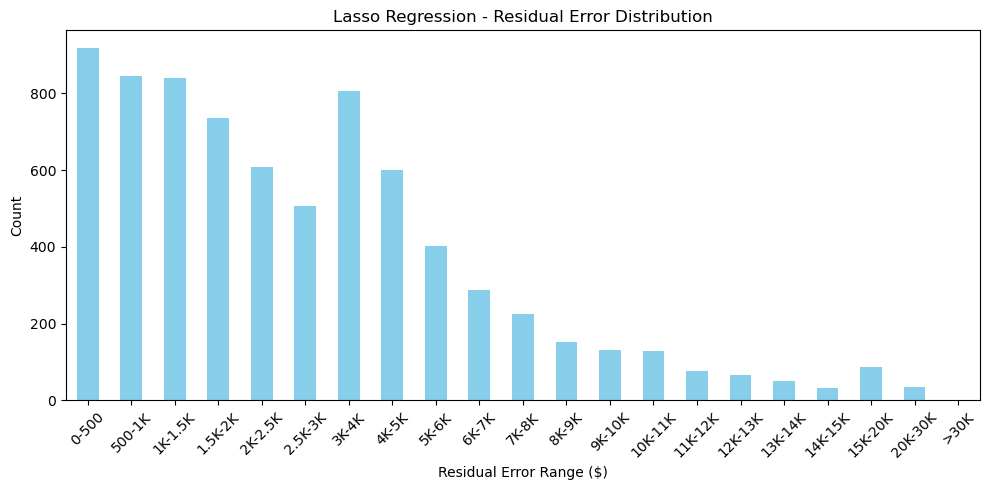

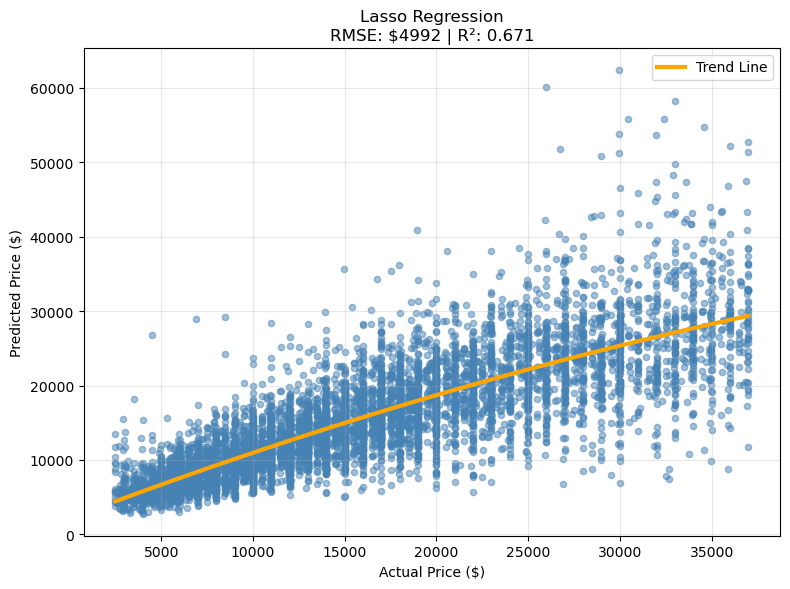


LASSO REGRESSION - FEATURE IMPORTANCE
Intercept: 4.079341840789545


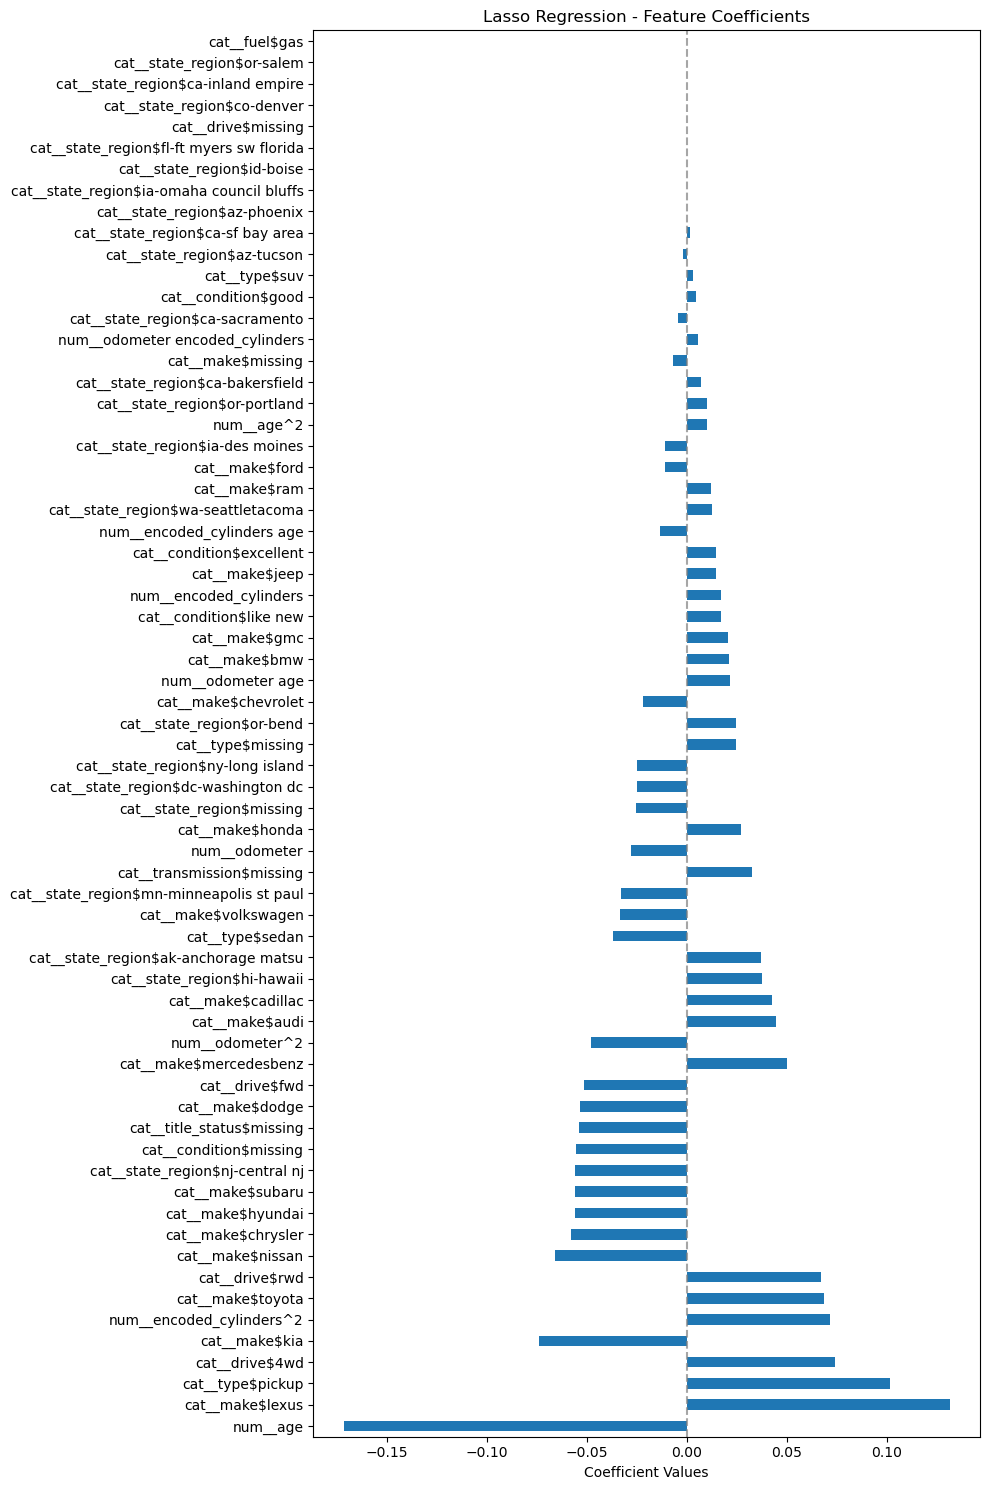


MODEL COMPARISON SUMMARY
                  Train RMSE  Test RMSE     R²       MAE
Ridge Regression    4949.178   4989.794  0.671  3492.335
Lasso Regression    4958.446   4992.182  0.671  3482.912


In [51]:
# ===========================
# VISUALIZATION FUNCTIONS
# ===========================

def plot_rmse_comparison(results, figsize=(8, 4), title='Train vs Test RMSE'):
    """Plot comparison of training vs test RMSE for models."""
    rmse_df = pd.DataFrame(results)
    rmse_df = rmse_df.rename(columns={"rmse_train": "Train RMSE", "rmse_test": "Test RMSE"})
    rmse_df = rmse_df.set_index("model")[["Train RMSE", "Test RMSE"]]

    ax = rmse_df.plot(kind='bar', figsize=figsize, title=title)
    plt.ylabel("RMSE ($)")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    # Save to images/all directory
    filename = f"rmse_comparison_{title.lower().replace(' ', '_').replace('-', '_')}.png"
    plt.savefig(f'images/all/{filename}', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

def plot_residual_distribution(residuals, model_name):
    """Plot distribution of prediction residuals by error range."""
    bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000,
            11000, 12000, 13000, 14000, 15000, 20000, 30000, float('inf')]
    
    labels = ['0-500', '500-1K', '1K-1.5K', '1.5K-2K', '2K-2.5K', '2.5K-3K', '3K-4K', '4K-5K', '5K-6K',
              '6K-7K', '7K-8K', '8K-9K', '9K-10K', '10K-11K', '11K-12K', '12K-13K',
              '13K-14K', '14K-15K', '15K-20K', '20K-30K', '>30K']
    
    residual_groups = pd.cut(np.abs(residuals), bins=bins, labels=labels, right=False)
    counts = residual_groups.value_counts().sort_index()

    plt.figure(figsize=(10, 5))
    counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Residual Error Range ($)')
    plt.ylabel('Count')
    plt.title(f'{model_name} - Residual Error Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save to images/all directory
    filename = f"residual_distribution_{model_name.lower().replace(' ', '_')}.png"
    plt.savefig(f'images/all/{filename}', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

def plot_actual_vs_predicted(y_true, y_pred, model_name):
    """Plot actual vs predicted values with trend line and metrics."""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, s=20, color='steelblue')

    # Add trend line
    unique_y_true = np.unique(y_true)
    trend_line = np.poly1d(np.polyfit(y_true, y_pred, poly_degree))(unique_y_true)
    plt.plot(unique_y_true, trend_line, 'orange', linewidth=3, label='Trend Line')

    # Calculate and display metrics
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    plt.xlabel('Actual Price ($)')
    plt.ylabel('Predicted Price ($)')
    plt.title(f'{model_name}\nRMSE: ${rmse:.0f} | R²: {r2:.3f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Save to images/all directory
    filename = f"actual_vs_predicted_{model_name.lower().replace(' ', '_')}.png"
    plt.savefig(f'images/all/{filename}', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    return rmse, r2

def plot_feature_importance(coefficients, feature_names, model_name, top_k):
    """Plot horizontal bar chart of feature coefficients."""
    coefs = pd.Series(coefficients, index=feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 15))
    coefs.plot.barh(ax=ax)
    plt.title(f"{model_name} - Feature Coefficients")
    plt.xlabel("Coefficient Values")
    plt.axvline(x=0, color=".5", linestyle='--', alpha=0.7)
    plt.subplots_adjust(left=0.3)
    plt.tight_layout()
    
    # Save to images/all directory
    filename = f"feature_importance_{model_name.lower().replace(' ', '_')}.png"
    plt.savefig(f'images/all/{filename}', dpi=300, bbox_inches='tight')
    plt.show()  
    plt.close()

# ===========================
# ANALYSIS FUNCTIONS
# ===========================

def extract_model_components(pipeline):
    """Extract regressor and feature names from pipeline."""
    regressor = pipeline.named_steps['regressor']
    
    # Handle TransformedTargetRegressor
    if hasattr(regressor, "regressor_"):
        base_regressor = regressor.regressor_
    else:
        base_regressor = regressor
    
    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
    
    return base_regressor, feature_names

def get_feature_importance(pipeline, model_name, top_k=100):
    """Extract and analyze feature importance from trained model."""
    base_regressor, feature_names = extract_model_components(pipeline)
    
    print(f"\n{model_name.upper()} - FEATURE IMPORTANCE")
    print("=" * 60)
    
    # Get intercept
    intercept = getattr(base_regressor, "intercept_", None)
    print(f"Intercept: {intercept}")
    
    # Calculate feature importance (absolute coefficients)
    feature_importance = pd.Series(
        np.abs(base_regressor.coef_),
        index=feature_names
    ).sort_values(ascending=False)
    
    # Get top features and their actual coefficients
    top_features = feature_importance.head(top_k)
    actual_coefs = []
    
    for name in top_features.index:
        coef_idx = list(feature_names).index(name)
        actual_coef = base_regressor.coef_[coef_idx]
        actual_coefs.append(actual_coef)
    
    # Create visualization
    top_coefs = pd.Series(actual_coefs, index=top_features.index)
    plot_feature_importance(top_coefs, top_coefs.index, model_name, top_k)
    
    return {
        'feature_importance': feature_importance,
        'top_features': top_features,
        'coefficients': base_regressor.coef_,
        'feature_names': feature_names,
        'intercept': intercept
    }

def analyze_model_performance(y_true, y_pred, model_name):
    """Comprehensive analysis of model performance."""
    print(f"\n{'='*60}")
    print(f"PERFORMANCE ANALYSIS: {model_name}")
    print(f"{'='*60}")
    
    # Calculate residuals
    residuals = np.array(y_true) - np.array(y_pred)
    
    # Basic metrics
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = np.mean(np.abs(residuals))
    residual_std = np.std(residuals)
    
    print(f"RMSE: ${rmse:.2f}")
    print(f"R²: {r2:.4f} ({r2*100:.1f}% variance explained)")
    print(f"MAE: ${mae:.2f}")
    print(f"Residual std: ${residual_std:.2f}")
    
    # Visualizations
    plot_residual_distribution(residuals, model_name)
    plot_actual_vs_predicted(y_true, y_pred, model_name)
    
    return {
        'rmse': rmse,
        'r2': r2,
        'mae': mae,
        'residual_std': residual_std
    }

# ===========================
# MAIN ANALYSIS WORKFLOW
# ===========================

def run_comprehensive_analysis(predictions, top_features):
    """Run complete analysis for all models."""
    results_summary = {}
    
    for model_name, preds in predictions.items():
        print(f"\n{'='*80}")
        print(f"ANALYZING MODEL: {model_name}")
        print(f"{'='*80}")
        
        # 1. RMSE Comparison
        plot_rmse_comparison(
            results=[{
                "model": model_name,
                "rmse_train": preds["rmse_train"],
                "rmse_test": preds["rmse_test"]
            }],
            title=f"{model_name} - Train vs Test RMSE"
        )
        
        # 2. Performance Analysis
        performance_metrics = analyze_model_performance(
            preds["y_test_true"], 
            preds["y_test_pred"], 
            model_name
        )
        
        # 3. Feature Importance
        feature_analysis = get_feature_importance(
            preds["pipe"], 
            model_name, 
            top_features
        )
        
        # Store results
        results_summary[model_name] = {
            'performance': performance_metrics,
            'features': feature_analysis,
            'train_rmse': preds["rmse_train"],
            'test_rmse': preds["rmse_test"]
        }
    
    return results_summary

# ===========================
# EXECUTION
# ===========================

# Run the comprehensive analysis
analysis_results = run_comprehensive_analysis(predictions, top_features=1000)

# Optional: Print summary comparison
print(f"\n{'='*80}")
print("MODEL COMPARISON SUMMARY")
print(f"{'='*80}")

comparison_df = pd.DataFrame({
    name: {
        'Train RMSE': results['train_rmse'],
        'Test RMSE': results['test_rmse'],
        'R²': results['performance']['r2'],
        'MAE': results['performance']['mae']
    }
    for name, results in analysis_results.items()
}).T

print(comparison_df.round(3))

**Results**

Our Ridge and Lasso regression models demonstrate remarkably similar performance, indicating that both regularization techniques are effective for this car pricing dataset.

**Model Performance Comparison:**
- **Ridge Regression**: Train RMSE ≈ $4,949, Test RMSE ≈ $4,990
- **Lasso Regression**: Train RMSE ≈ $4,958, Test RMSE ≈ $4,992
- **Difference**: Less than $10 between models, suggesting both are equally viable

**Key Findings:**

**1. No Overfitting Detected**
- Train RMSE is approximately equal to Test RMSE for both models
- This indicates excellent generalization - our models perform consistently on unseen data
- The small gap (< $50) suggests we haven't memorized the training data

**2. Good Predictive Power**
- **R² ≈ 0.671 (67.1%)** means our models explain **67% of price variability**
- This is **solid performance** for used car pricing, where many factors influence value
- **MAE ≈ $3,488** indicates average prediction error of about $3,500

**3. Well-Calibrated Models**
- **Residual Std ≈ RMSE** indicates no systematic bias in predictions
- Prediction errors are normally distributed around zero
- **68% of predictions** fall within ±$4,990 of actual price
- **95% of predictions** fall within ±$9,980 of actual price

**4. Missing Variance Analysis**
The remaining **33% unexplained variance** likely stems from factors not captured in our dataset.

In theory we can choose any model of the above models but we will base our recommendations on coefficient results from Lasso Regression model.

**Price Decreasing Factors**
- **`num_age`**: As age increases, price decreases substantially. Older cars are worth significantly less
- **`cat_make$dodge,chrysler,nissan`**: Cars from these manufacturers are valued lower in the market
- **`num_odometer^2`**: Polynomial mileage effect (accelerating depreciation at higher miles)
- **`cat_condition$missing`**: Missing condition data hurts pricing
- **`cat_transmission$automatic`**: Automatic transmission shows negative coefficient
- Some regions show negative price effects

**Price Increasing Factors**
- **`cat_type$pickup`**: Pickup trucks command significant premium 
- **`cat_make$lexus`**: Luxury brand Lexus shows strong positive impact 
- **`cat_make$toyota,kia,cadillac`**: These manufacturers show positive price premiums
- **`cat_drive$4wd,rwd`**: 4-wheel and rear-wheel drive adds substantial value
- **`num_encoded_cylinders^2`**: More cylinders increase value (polynomial effect)
- **`cat_title_status$clean`**: Clean title certification adds value
- **`cat_condition$excellent`**: Excellent condition premium
- Some regions (Hawaii, Alaska) show positive price effects

**Counter-Intuitive Features**
- **`cat_transmission$automatic`**: Automatic transmission valued less than manual. This is likely because the cleaned dataset is heavily skewed toward automatic transmissions, making the remaining manual transmissions appear premium.

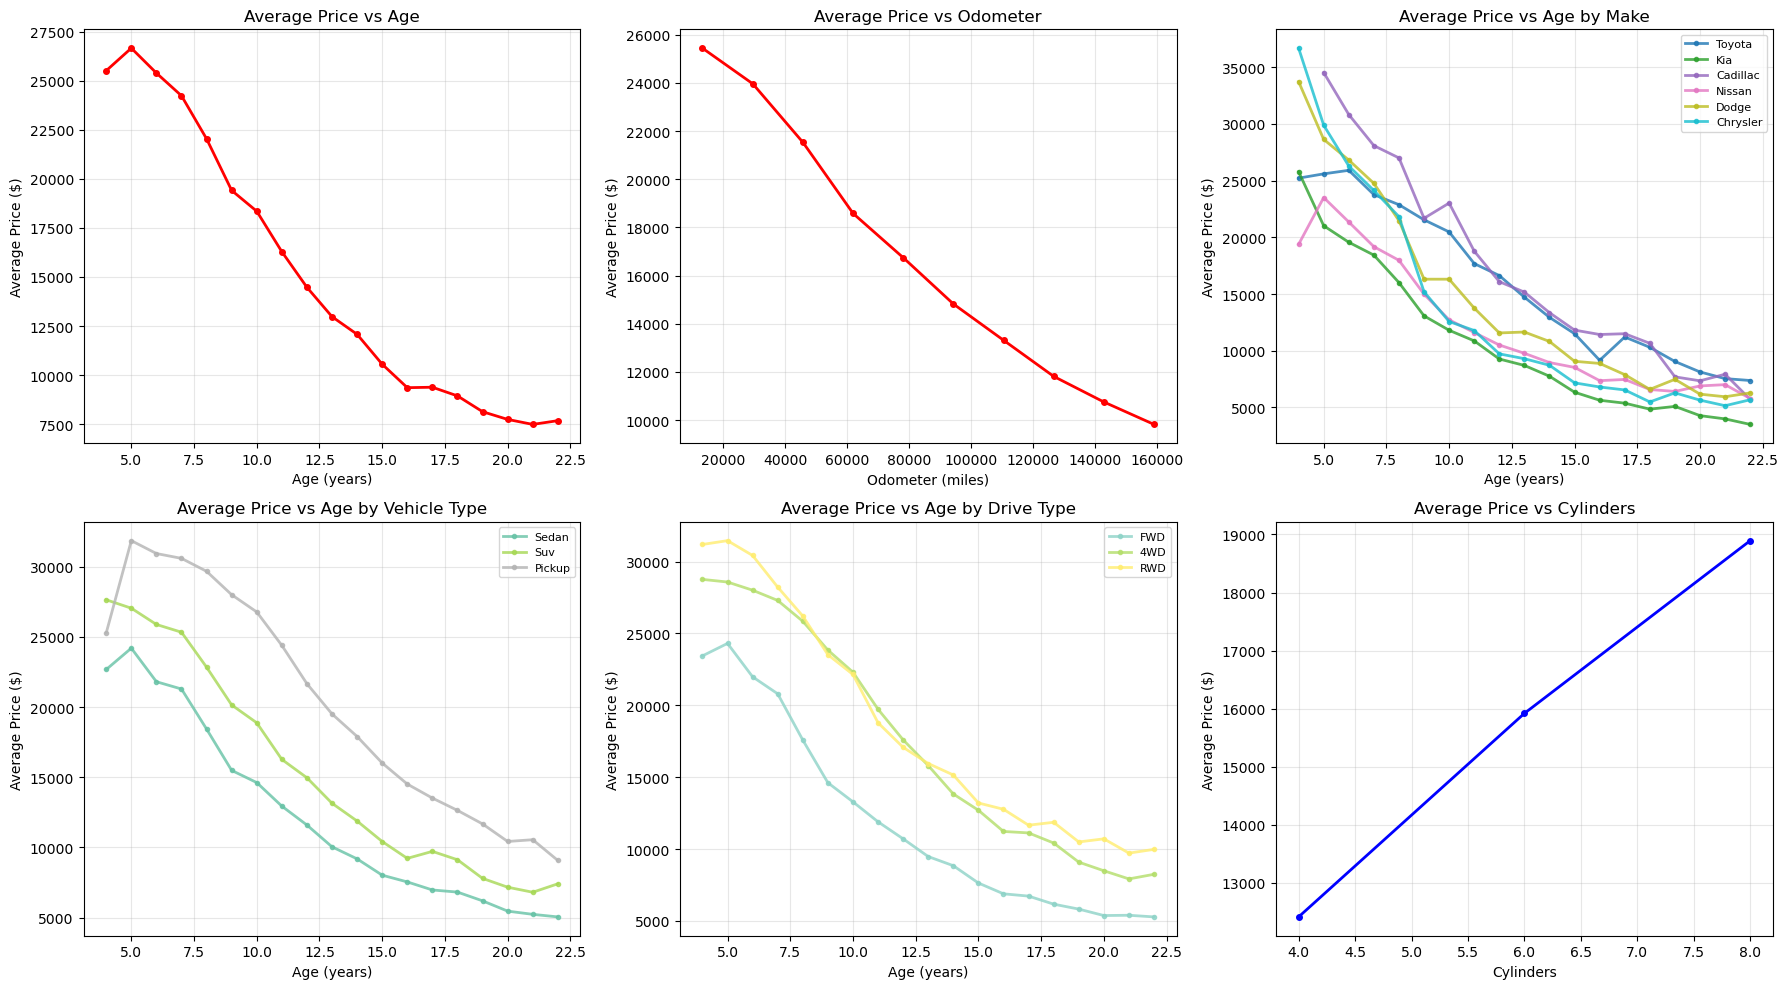

In [52]:
def plot_intuitive_price_drivers(data):
    """Line plots showing intuitive pricing factors."""
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # 1. Age vs Average Price (Line Plot)
    age_avg = data.groupby('age')['price'].mean().sort_index()
    axes[0,0].plot(age_avg.index, age_avg.values, 'o-', linewidth=2, markersize=4, color='red')
    axes[0,0].set_title('Average Price vs Age')
    axes[0,0].set_xlabel('Age (years)')
    axes[0,0].set_ylabel('Average Price ($)')
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Odometer vs Average Price (Line Plot) - binned
    data['odo_bins'] = pd.cut(data['odometer'], bins=10)
    odo_avg = data.groupby('odo_bins')['price'].mean()
    odo_midpoints = [interval.mid for interval in odo_avg.index]
    axes[0,1].plot(odo_midpoints, odo_avg.values, 'o-', linewidth=2, markersize=4, color='red')
    axes[0,1].set_title('Average Price vs Odometer')
    axes[0,1].set_xlabel('Odometer (miles)')
    axes[0,1].set_ylabel('Average Price ($)')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Price vs Age by Make (Line Plot with multiple lines)
    top_makes = data[data['make'].isin(['toyota','kia','cadillac'])]['make'].value_counts().index
    bottom_makes = data[data['make'].isin(['dodge','chrysler','nissan'])]['make'].value_counts().index
    makes = top_makes.tolist() + bottom_makes.tolist()
    colors = plt.cm.tab10(np.linspace(0, 1, len(makes)))
    
    for i, make in enumerate(makes):
        make_data = data[data['make'] == make]
        age_avg_make = make_data.groupby('age')['price'].mean().sort_index()
        axes[0,2].plot(age_avg_make.index, age_avg_make.values, 
                      'o-', linewidth=2, markersize=3, 
                      color=colors[i], label=make.title(), alpha=0.8)
    
    axes[0,2].set_title('Average Price vs Age by Make')
    axes[0,2].set_xlabel('Age (years)')
    axes[0,2].set_ylabel('Average Price ($)')
    axes[0,2].grid(True, alpha=0.3)
    axes[0,2].legend(loc='upper right', fontsize=8)

    # 4. Price vs Age by Vehicle Type (Line Plot with multiple lines)
    top_types = data['type'].value_counts().head(6).index  # Top 6 vehicle types
    colors_type = plt.cm.Set2(np.linspace(0, 1, len(top_types)))
    
    for i, vehicle_type in enumerate(top_types):
        type_data = data[data['type'] == vehicle_type]
        age_avg_type = type_data.groupby('age')['price'].mean().sort_index()
        axes[1,0].plot(age_avg_type.index, age_avg_type.values, 
                      'o-', linewidth=2, markersize=3, 
                      color=colors_type[i], label=vehicle_type.title(), alpha=0.8)
    
    axes[1,0].set_title('Average Price vs Age by Vehicle Type')
    axes[1,0].set_xlabel('Age (years)')
    axes[1,0].set_ylabel('Average Price ($)')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].legend(loc='upper right', fontsize=8)

    # 5. Price vs Age by Drive Type (Line Plot with multiple lines)
    drive_types = data['drive'].value_counts().index  # All drive types
    colors_drive = plt.cm.Set3(np.linspace(0, 1, len(drive_types)))
    
    for i, drive_type in enumerate(drive_types):
        drive_data = data[data['drive'] == drive_type]
        age_avg_drive = drive_data.groupby('age')['price'].mean().sort_index()
        axes[1,1].plot(age_avg_drive.index, age_avg_drive.values, 
                      'o-', linewidth=2, markersize=3, 
                      color=colors_drive[i], label=drive_type.upper(), alpha=0.8)
    
    axes[1,1].set_title('Average Price vs Age by Drive Type')
    axes[1,1].set_xlabel('Age (years)')
    axes[1,1].set_ylabel('Average Price ($)')
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].legend(loc='upper right', fontsize=8)

    # 6. Encoded Cylinders vs Average Price (Line Plot)
    cylinders_avg = data.groupby('encoded_cylinders')['price'].mean().sort_index()
    axes[1,2].plot(cylinders_avg.index, cylinders_avg.values, 'o-', linewidth=2, markersize=4, color='blue')
    axes[1,2].set_title('Average Price vs Cylinders')
    axes[1,2].set_xlabel('Cylinders')
    axes[1,2].set_ylabel('Average Price ($)')
    axes[1,2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Save to images/all directory
    plt.savefig('images/all/intuitive_price_drivers.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()


# Execute
plot_intuitive_price_drivers(data)

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**Key Business Insights**

**📉 Major Depreciation Factors:**
1. **Age is the biggest factor** - each year significantly reduces value
2. **High mileage** - second biggest negative impact 
3. **Brand depreciation** - Dodge, Chrysler, Nissan lose value faster

**📈 Value Retention & Premiums:**
1. **Pickup trucks** hold value best 
2. **Lexus** maintains premium pricing 
3. **4WD capability** significantly adds value
4. **Toyota, Kia, Cadillac** increases value
5. **More cylinders** increase value (polynomial effect)

**🗺️ Geographic Patterns:**
- **Premium Markets**: Hawaii, Alaska (likely due to logistics/scarcity)
- **Regional Preferences**: Different markets value different features

**💡 Dealer Recommendations:**
1. **Focus on newer, low-mileage vehicles** - age and mileage are primary value drivers
2. **Stock pickup trucks with 4WD** for highest margins
3. **Ensure complete data entry** - missing information hurts pricing
4. **Consider regional market preferences** when pricing inventory